<a href="https://colab.research.google.com/github/fogg-lab/tissue-model-analysis-tools/blob/main/notebooks/analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tissue Model Analysis Tools Demo
**Length**: 15-20 minutes

## Description
Runs `fl_tissue_model_analysis_tools` on example data from the [tissue-model-analysis-tools-data](https://github.com/fogg-lab/tissue-model-analysis-tools-data) repository.

**Important note**: Most of the code in this notebook is for purposes of the demonstration, e.g. to install dependencies or view output within the Jupyter notebook environment. It is a demo of the capabilities of the Tissue Model Analysis Tools (`tmat`) package, not a tutorial for usage. You do not need to know how to code to use `tmat` (see the `README.md` file on GitHub for detailed instructions for usage).

## Instructions

### 1) Make sure the Colab runtime is using GPU.
Change the Colab runtime type to use GPU acceleration, so that the invasion depth and microvessel analysis scripts run faster.
> In the toolbar, go to Runtime -> Change runtime type. Make sure a GPU based option such as T4 is selected.

### 2) Run the Environment Setup section

Run the setup cells to install the `fl_tissue_model_tools` package and dependencies in the Colab runtime.

### 3) Run the demo

We run each analysis using the scripts from the [fl_tissue_model_tools](https://github.com/fogg-lab/tissue-model-analysis-tools) package, via the command line utility (`tmat`) that is installed alongside the package. In this notebook, these commands are prefixed with an exclamation mark (`!tmat ...`). The equivalent command to run in a regular terminal is the same, but without the `!`.

After running the setup cells, you can customize the scripts and their configurations by modifying the files stored in tmat's base directory: /content/fl_tissue_model_tools.

Alternatively, you can run these analyses on your own data. For best results on invasion depth and microvessel formation analysis, you will need to train your own models. To train the invasion depth classifier and the microvessel segmentation model (on a CUDA-capable system), refer to the [training notebooks](https://github.com/fogg-lab/tissue-model-analysis-tools/tree/main/notebooks) in the GitHub repository.

## Environment setup (for Colab)

**Expected runtime**: 2 minutes

**If you are not in Colab, follow the installation instructions in the README.**

In [ ]:
# NOTE: This setup is specific to the Colab environment, not required to use the tmat package

def in_colab() -> bool:
    """Check if the code is running in Google Colab."""
    try:
        import google.colab
        return True
    except ImportError:
        return False

REQUIREMENTS = """
albumentations>=1.3.1,<=1.4.1
dask==2024.5.1
gudhi==3.9.0
imagecodecs==2024.1.1
jupyterlab==4.2.1
matplotlib==3.8.4
networkx==3.3
opencv-python>=4.8.1,<=4.9.0
pandas==2.2.2
pillow==10.3.0
pip==24.0
scikit-image==0.22.0
scikit-learn==1.5.0
scipy==1.13.1
tifffile==2024.5.22
tqdm==4.66.4
keras==2.13.1
keras-tuner==1.4.7
numpy==1.24.3
tensorflow[with-gpu]==2.13.0
pyometiff==1.0.0
"""

if in_colab():
    # Installed here: Python packages possibly missing or wrong version in the Colab runtime
    !sudo apt-get install libboost-all-dev
    with open('requirements.txt', 'w') as f:
        f.write(REQUIREMENTS)

    # Install the fl_tissue_model_tools (tmat) package
    !pip install -I fl_tissue_model_tools@git+https://github.com/fogg-lab/tissue-model-analysis-tools.git#subdirectory=src

    # Configure package home directory
    !tmat configure /content/fl_tissue_model_tools
else:
    print('Not in Google Colab. Skipping environment setup.')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 20.7 MB/s eta 0:00:00
  Cloning https://github.com/fogg-lab/tissue-model-analysis-tools.git to /tmp/pip-install-_7tci88u/fl-tissue-model-tools_e5ee2f9385e8471f84b0ac9a48c980d9
  Running command git clone --filter=blob:none --quiet https://github.com/fogg-lab/tissue-model-analysis-tools.git /tmp/pip-install-_7tci88u/fl-tissue-model-tools_e5ee2f9385e8471f84b0ac9a48c980d9
  Resolved https://github.com/fogg-lab/tissue-model-analysis-tools.git to commit b0d8e6e85e20826cc86c1b85fe29031f08e1f69f
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for fl_tissue_model_tools: filename=fl_tissue_m

## Download example input data

**Expected runtime**: 2 minutes

In [ ]:
!git clone https://github.com/fogg-lab/tissue-model-analysis-tools-data.git

Cloning into 'tissue-model-analysis-tools-data'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 256
Receiving objects: 100% (259/259), 1.28 GiB | 32.87 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (250/250), done.


## Print `tmat` package usage with the `--help` (`-h`) flag

In [ ]:
!tmat -h

Usage: tissue-model-analysis-tools [SUBCOMMAND] [OPTIONS]
Shorthand: tmat [SUBCOMMAND] [OPTIONS]

If no subcommand is given, the interactive mode will be used. For example, run: tmat

Available subcommands:
    configure: Set the location of the base directory for scripts and model training data.
    update: Update the package from GitHub.
    [SCRIPT_NAME]: Run a script from the scripts directory. Do not include the .py extension.

Get available options:
    -h, --help: Show this help message and exit.
    [SUBCOMMAND] -h: Show help (including available options) for a particular subcommand.

Examples:
    tmat configure -h
    tmat configure "C:\Users\Quinn\Desktop\some_folder_name"
    tmat update
    tmat compute_inv_depth -h
    tmat compute_zproj -v "C:\Users\Quinn\input_folder_name" "C:\Users\Quinn\out_folder_name"



## Z Projection

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_zproj.py

**Input images:** /content/tissue-model-analysis-tools-data/zprojection_input

In [ ]:
# Run the Z projection utility
!tmat compute_zproj /content/tissue-model-analysis-tools-data/zprojection_input /content/zproj_demo_out

Executing: /usr/bin/python3 /content/fl_tissue_model_tools/scripts/compute_zproj.py --verbose /content/tissue-model-analysis-tools-data/zprojection_input /content/zproj_demo_out
2024-05-24 17:11:03.331557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 17:11:03.331617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 17:11:03.332978: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
['--verbose', '/content/tissue-model-analysis-tools-data/zprojection_input', '/content/zproj_demo_out']

[Verifying Input Directory]=======================================================

### Output
Stored in /content/zproj_demo_out

Show the projections side-by-side:

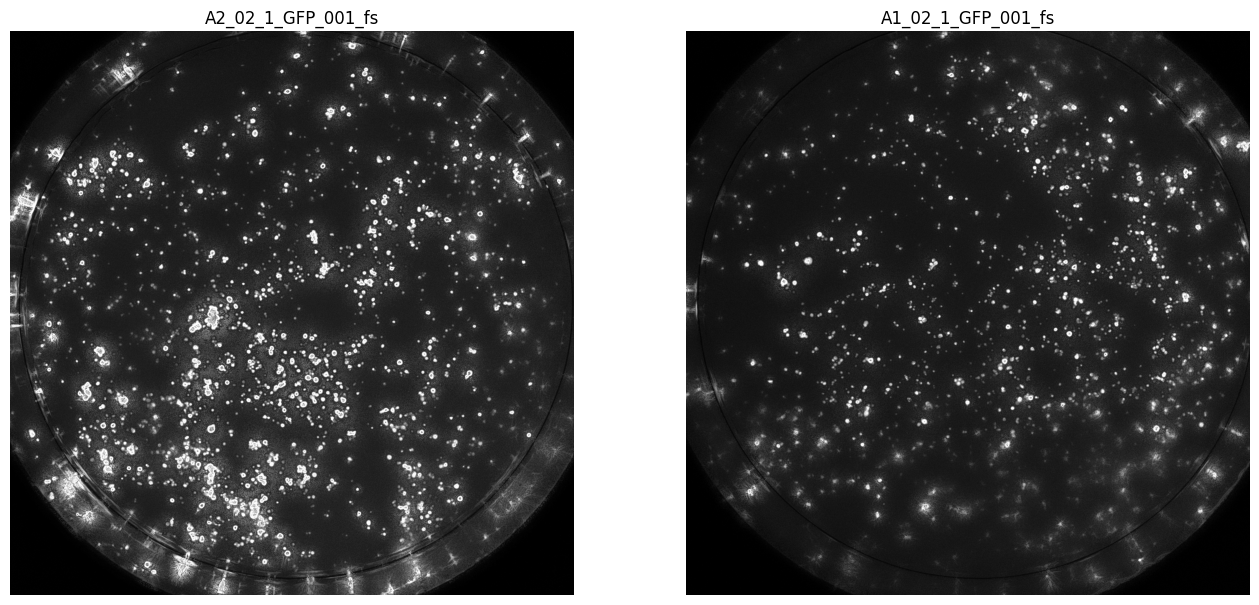

In [ ]:
# NOTE: The code below is specific to this demo notebook, and is not required for using the tmat package.

from matplotlib import pyplot as plt
from skimage import io
from glob import glob
import os

zprojection_paths = glob('/content/zproj_demo_out/*.tif')
zprojections = [io.imread(zp) for zp in zprojection_paths]

plt.figure(figsize=(16, 16))

for index, (zprojection, zp_path) in enumerate(zip(zprojections, zprojection_paths), start=1):
    plt.subplot(1, len(zprojections), index)
    plt.imshow(zprojection, cmap='gray')
    plt.axis('off')

    image_name = os.path.splitext(os.path.basename(zp_path))[0]
    plt.title(image_name)

plt.show()

## Cell Coverage Area Analysis

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_cell_area.py

**Configuration:** /content/fl_tissue_model_tools/config/default_cell_area_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/zprojection_input

In [ ]:
# Run the cell area script
!tmat compute_cell_area --detect-well /content/tissue-model-analysis-tools-data/cell_coverage_area_input /content/cellarea_demo_out

Executing: /usr/bin/python3 /content/fl_tissue_model_tools/scripts/compute_cell_area.py --verbose /content/tissue-model-analysis-tools-data/cell_coverage_area_input /content/cellarea_demo_out
2024-05-24 17:11:15.976107: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 17:11:15.976155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 17:11:15.977371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

[Verifying Input Directory]=========================================================================
Found 64 images in:
	/content/tissue-model-analysis-tools-data/cell_cov

### Output

Stored in /content/cellarea_demo_out

*You can also load the .csv output in Excel or any other spreadsheet program.*

In [ ]:
# NOTE: The command below is specific to this demo notebook. Advanced command-line knowledge is NOT needed to use the tool!
!cat /content/cellarea_demo_out/calculations/cell_area.csv | perl -pe 's/((?<=,)|(?<=^)),/ ,/g;' | column -t -s,

image_id             area_pct
D3_-2_1_1_ZProj_004  4.460986270177436
D2_-2_1_1_ZProj_010  3.829506162337435
B1_-2_1_1_ZProj_004  5.930762142951164
D3_-2_1_1_ZProj_001  5.844226891675741
C6_-1_1_1_ZProj_001  9.281934390176854
D1_-2_1_1_ZProj_001  8.738458780291033
C4_-2_1_1_ZProj_007  10.786744815148783
C3_-2_1_1_ZProj_007  8.139163400920088
B7_-1_1_1_ZProj_004  11.070419959771632
C6_-1_1_1_ZProj_010  4.34335584335343
C2_-2_1_1_ZProj_010  11.28376824187901
B8_-1_1_1_ZProj_007  6.864241001564945
C1_-2_1_1_ZProj_010  5.467870491286531
C5_-1_1_1_ZProj_007  5.75861334556595
B6_-1_1_1_ZProj_007  5.4981593003213245
C5_-1_1_1_ZProj_001  8.737538606961893
C8_-1_1_1_ZProj_010  4.21592372604425
D1_-2_1_1_ZProj_003  9.523143029098492
D2_-2_1_1_ZProj_007  7.0508867335688
C8_-1_1_1_ZProj_007  5.996731926887494
B6_-1_1_1_ZProj_010  3.582713554877262
C2_-2_1_1_ZProj_001  14.452091053467441
D1_-2_1_1_ZProj_007  9.04208931931886
B8_-1_1_1_ZProj_010  4.317023172471552
C3_-2_1_1_ZProj_010  8.6983304837574

## Invasion Depth Analysis

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_inv_depth.py

**Configuration:** /content/fl_tissue_model_tools/config/default_invasion_depth_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/invasion_depth_input

**Trained model data:** /content/fl_tissue_model_tools/model_training/best_ensemble

In [ ]:
# Run the invasion depth script
!tmat compute_inv_depth /content/tissue-model-analysis-tools-data/invasion_depth_input /content/invasion_demo_out

Executing: /usr/bin/python3 /content/fl_tissue_model_tools/scripts/compute_inv_depth.py --verbose /content/tissue-model-analysis-tools-data/invasion_depth_input /content/invasion_demo_out
2024-05-24 17:11:43.236777: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 17:11:43.236827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 17:11:43.238322: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

[Verifying Input Directory]=========================================================================
Z Stack ID                                                       No. Z Posi

### Output

Full output is stored in /content/invasion_demo_out

*You can also load the .csv output in Excel or any other spreadsheet program.*

In [ ]:
# NOTE: The command below is specific to this demo. Advanced command-line knowledge is NOT needed to use the tool!
!cat /content/invasion_demo_out/invasion_depth_predictions.csv | perl -pe 's/((?<=,)|(?<=^)),/ ,/g;' | column -t -s,

img_name                        inv_prob       inv_label
C1_02_2_1Z13_Texas Red_001.tif  0.004256871    0
C1_02_2_1Z12_Texas Red_001.tif  0.0041463985   0
C1_02_2_1Z11_Texas Red_001.tif  0.0033662543   0
C1_02_2_1Z10_Texas Red_001.tif  0.0025427043   0
C1_02_2_1Z9_Texas Red_001.tif   0.0017179488   0
C1_02_2_1Z8_Texas Red_001.tif   0.0011226513   0
C1_02_2_1Z7_Texas Red_001.tif   0.00072648656  0
C1_02_2_1Z6_Texas Red_001.tif   0.0008041973   0
C1_02_2_1Z5_Texas Red_001.tif   0.0015115492   0
C1_02_2_1Z4_Texas Red_001.tif   0.028937489    0
C1_02_2_1Z3_Texas Red_001.tif   0.90273434     1
C1_02_2_1Z2_Texas Red_001.tif   0.999397       1
C1_02_2_1Z1_Texas Red_001.tif   0.99889183     1
C1_02_2_1Z0_Texas Red_001.tif   0.78109497     1


## Microvessel Formation Analysis

**Expected runtime**: 5-10 minutes

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_branches.py

**Configuration:** /content/fl_tissue_model_tools/config/default_branching_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/branching_input

**Trained model data:** /content/fl_tissue_model_tools/model_training/binary_segmentation

In [ ]:
# Copy `n` images from the full set of demo input images into a smaller directory to run the analysis on
n = 10
# NOTE: The command below is specific to this demo. Advanced command-line knowledge is NOT needed to use the tool.
!cd /content/tissue-model-analysis-tools-data/branching_input && mkdir -p input_set && find . -maxdepth 1 -type f -iname "*.tif" | head -${n} | xargs -I '{}' cp '{}' input_set/

# Run the branching script:
!tmat compute_branches --detect-well /content/tissue-model-analysis-tools-data/branching_input/input_set /content/branching_demo_out

Executing: /usr/bin/python3 /content/fl_tissue_model_tools/scripts/compute_branches.py --verbose -g /content/tissue-model-analysis-tools-data/branching_input/input_set /content/branching_demo_out
2024-05-24 17:12:06.735976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 17:12:06.736048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 17:12:06.737449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

Analyzing F2_017...
Applying mask to image...

Segmenting image...
2/2 [==============================] - 0s 367ms/step
100% 8/8 [00:38<00:00,  4.77s/it]

Computing gra

### Output

Stored in /content/branching_demo_out

*You can also load the .csv output in Excel or any other spreadsheet program.*

#### 1. Show the .csv output

In [ ]:
# NOTE: The code below is specific to this demo notebook. As previously noted, you can also just use Excel.

import pandas as pd

csv_path = '/content/branching_demo_out/branching_analysis.csv'
df = pd.read_csv(csv_path, encoding='utf-16')
print(df.to_string(index=False))

     Image  Total # of branches  Total branch length (µm)  Average branch length (µm)
    F2_017                   34               1610.373240                   47.363919
    B1_005                   10                560.532923                   56.053292
    B4_001                   35               1673.545356                   47.815582
    D6_001                    3                128.205107                   42.735036
    B3_006                   61               2258.609311                   37.026382
    C4_002                   36               1706.543123                   47.403976
  C4_001-1                   38               2080.126609                   54.740174
    A5_006                   73               2875.545719                   39.391037
    B2_006                   54               3656.176137                   67.706966
C4_001 (1)                   36               2015.228538                   55.978571


#### 2. Show visualizations for 5 random images

*Samples with no branches are skipped.*

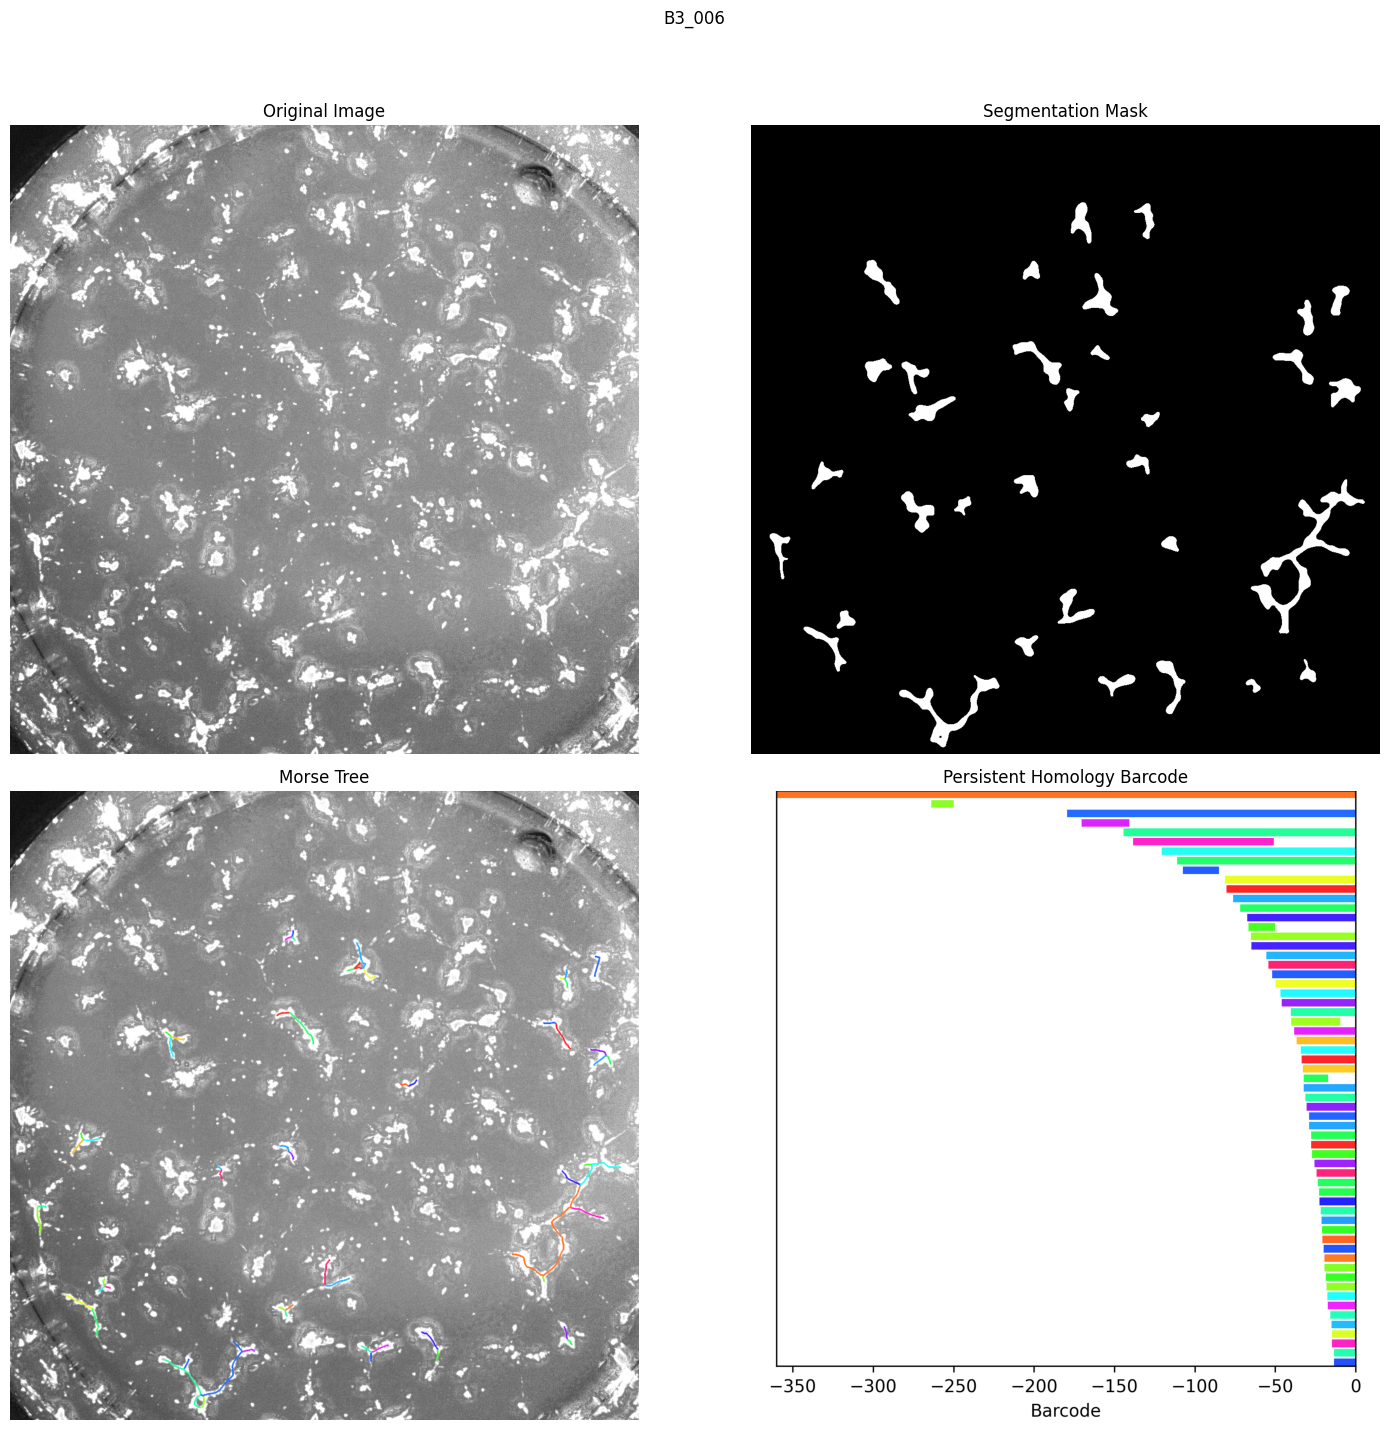

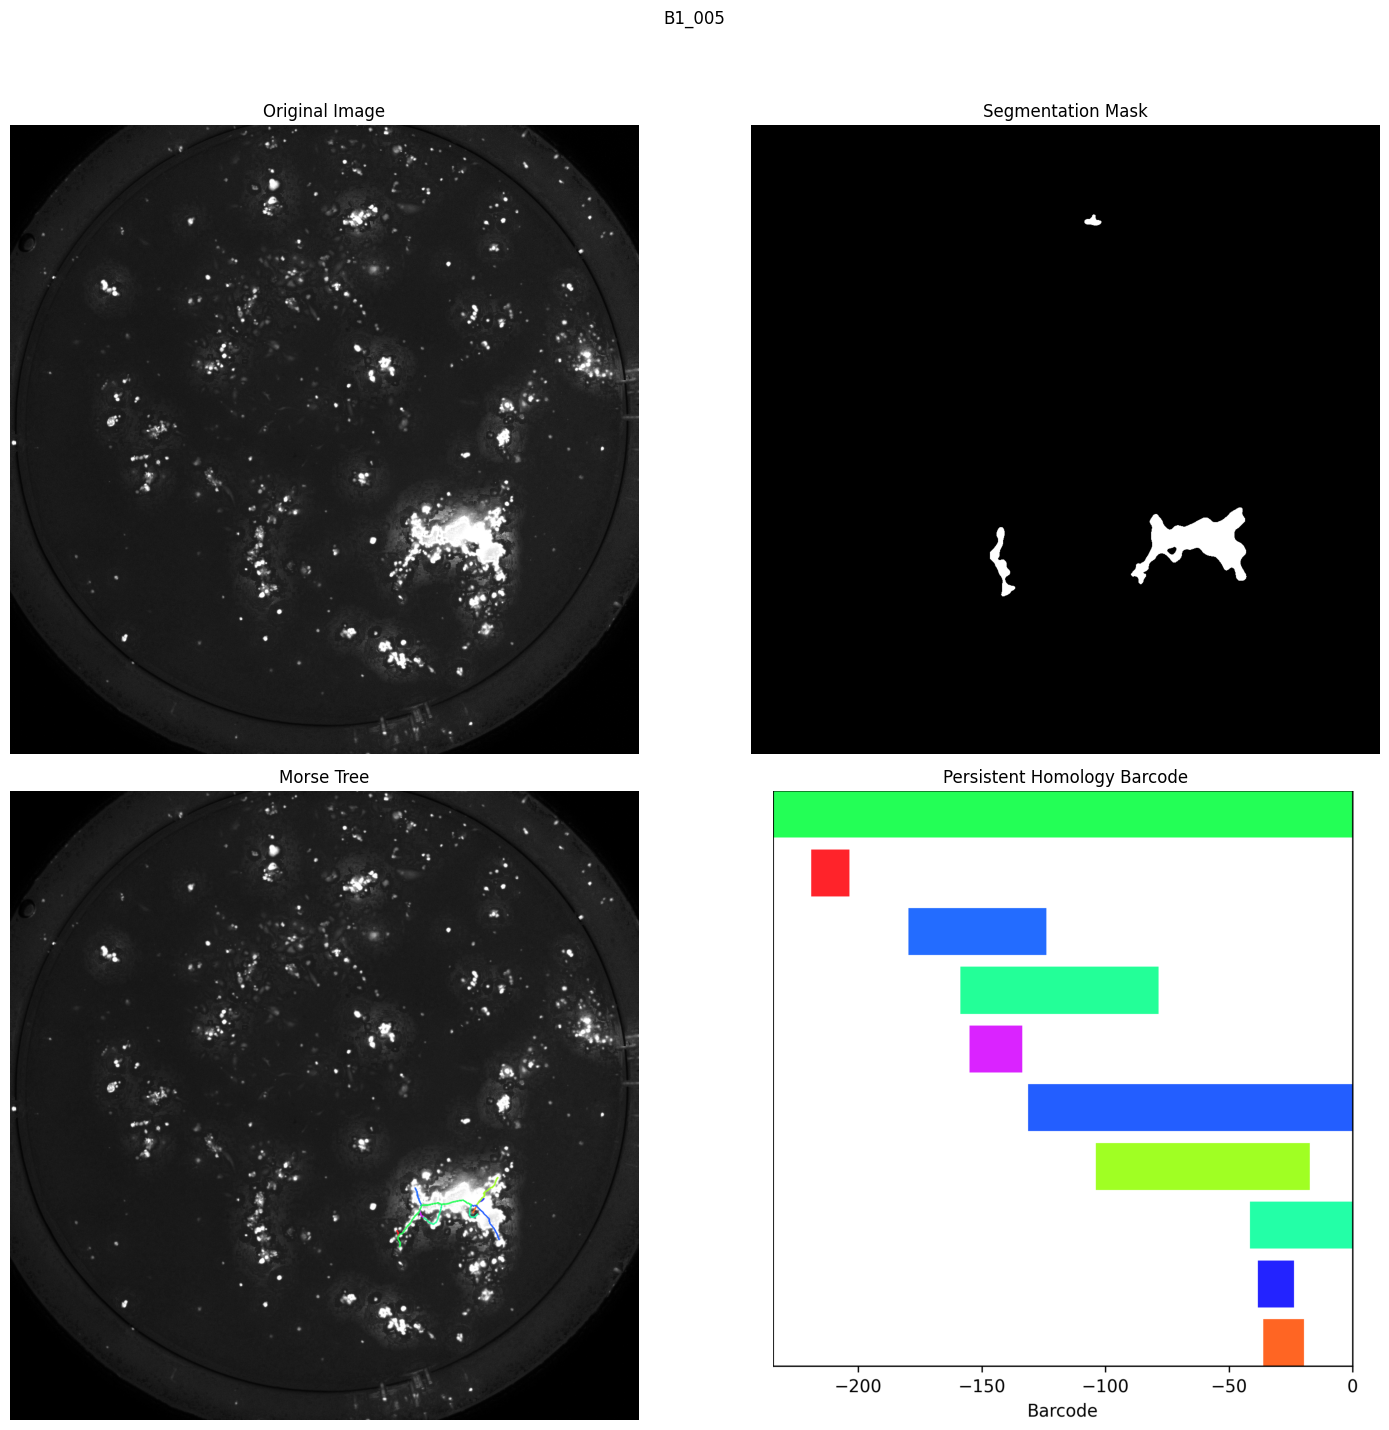

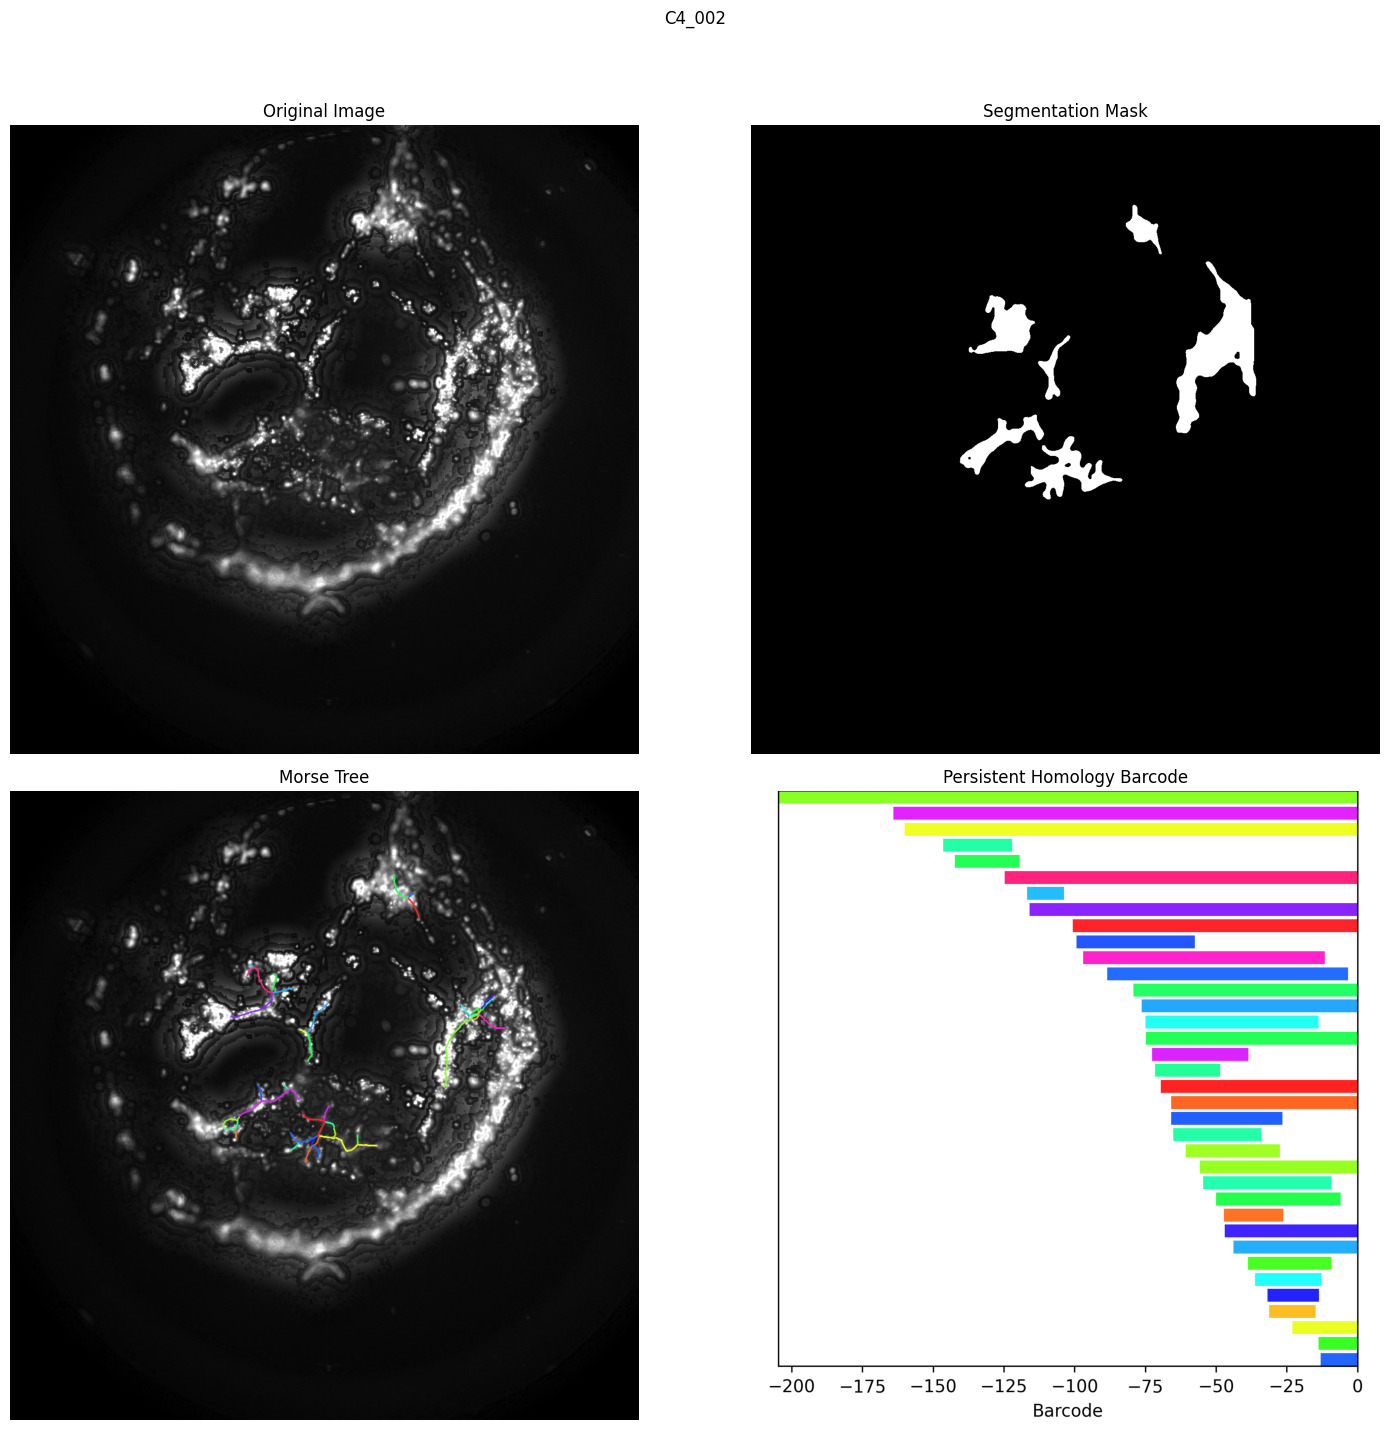

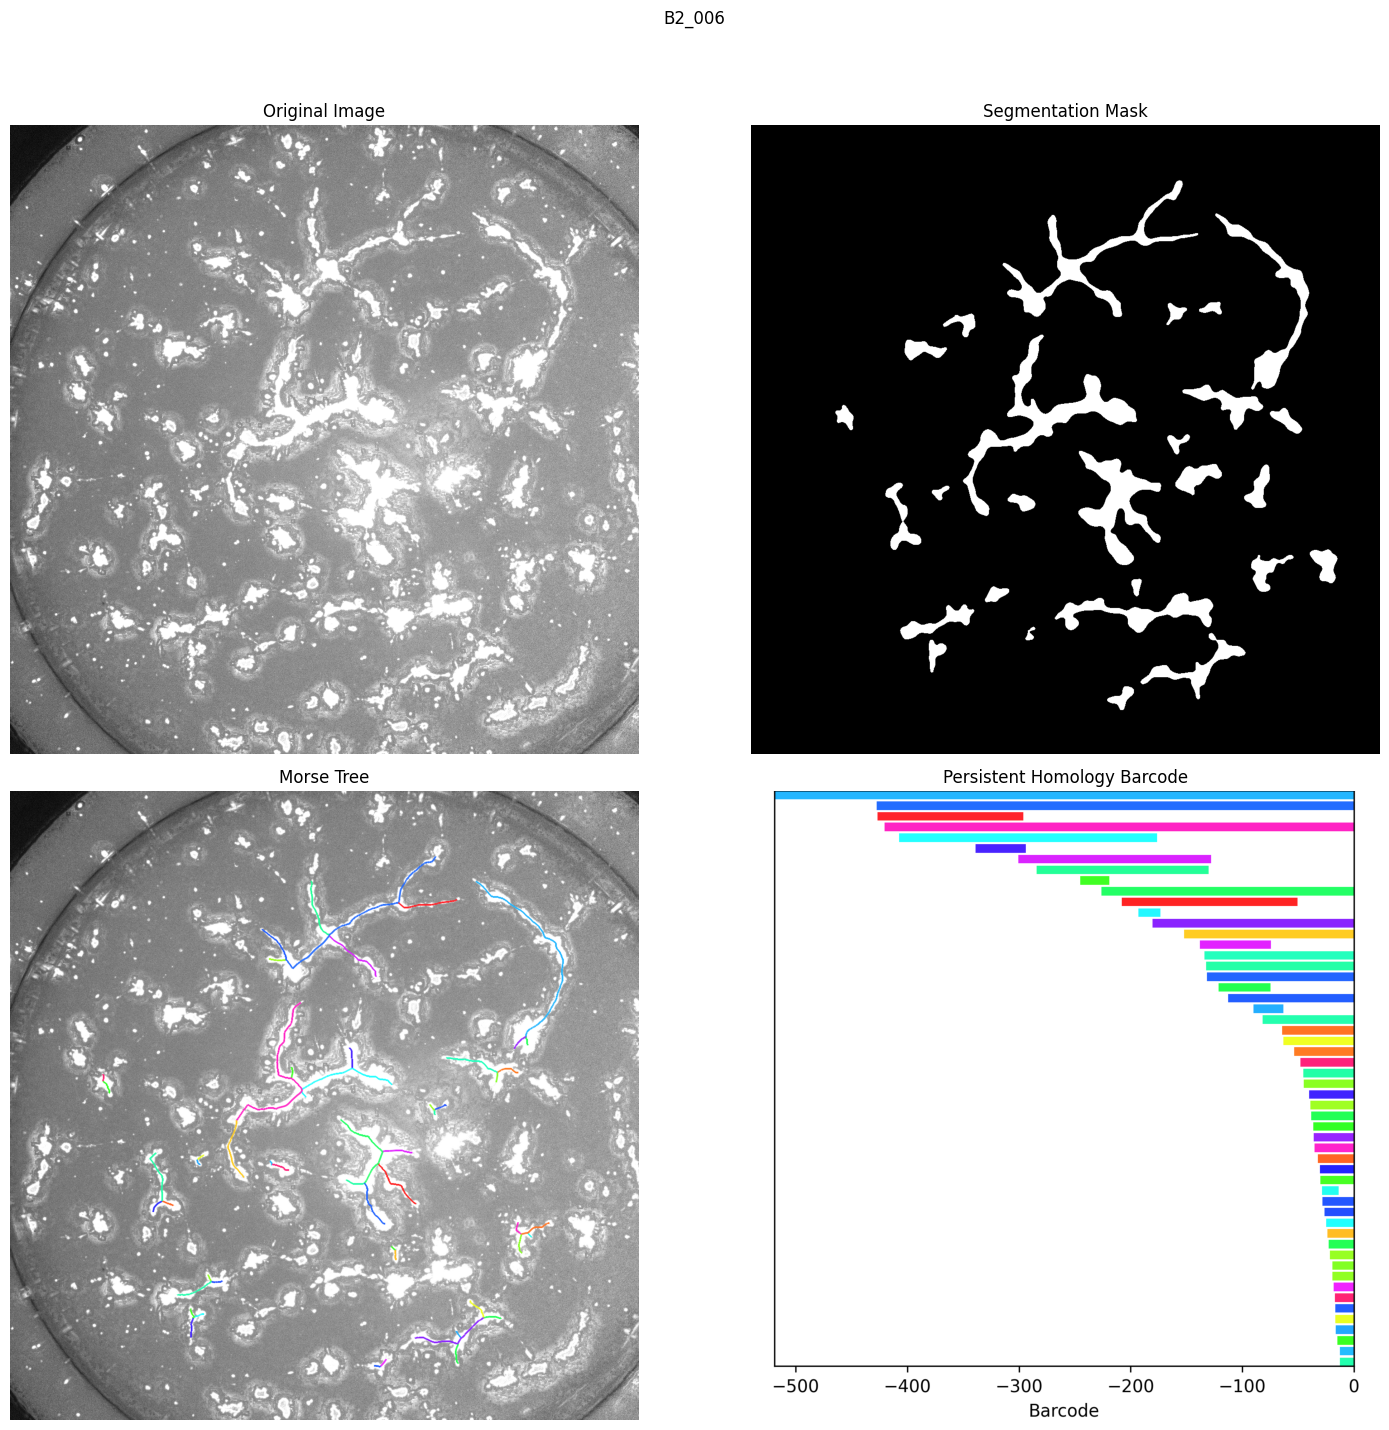

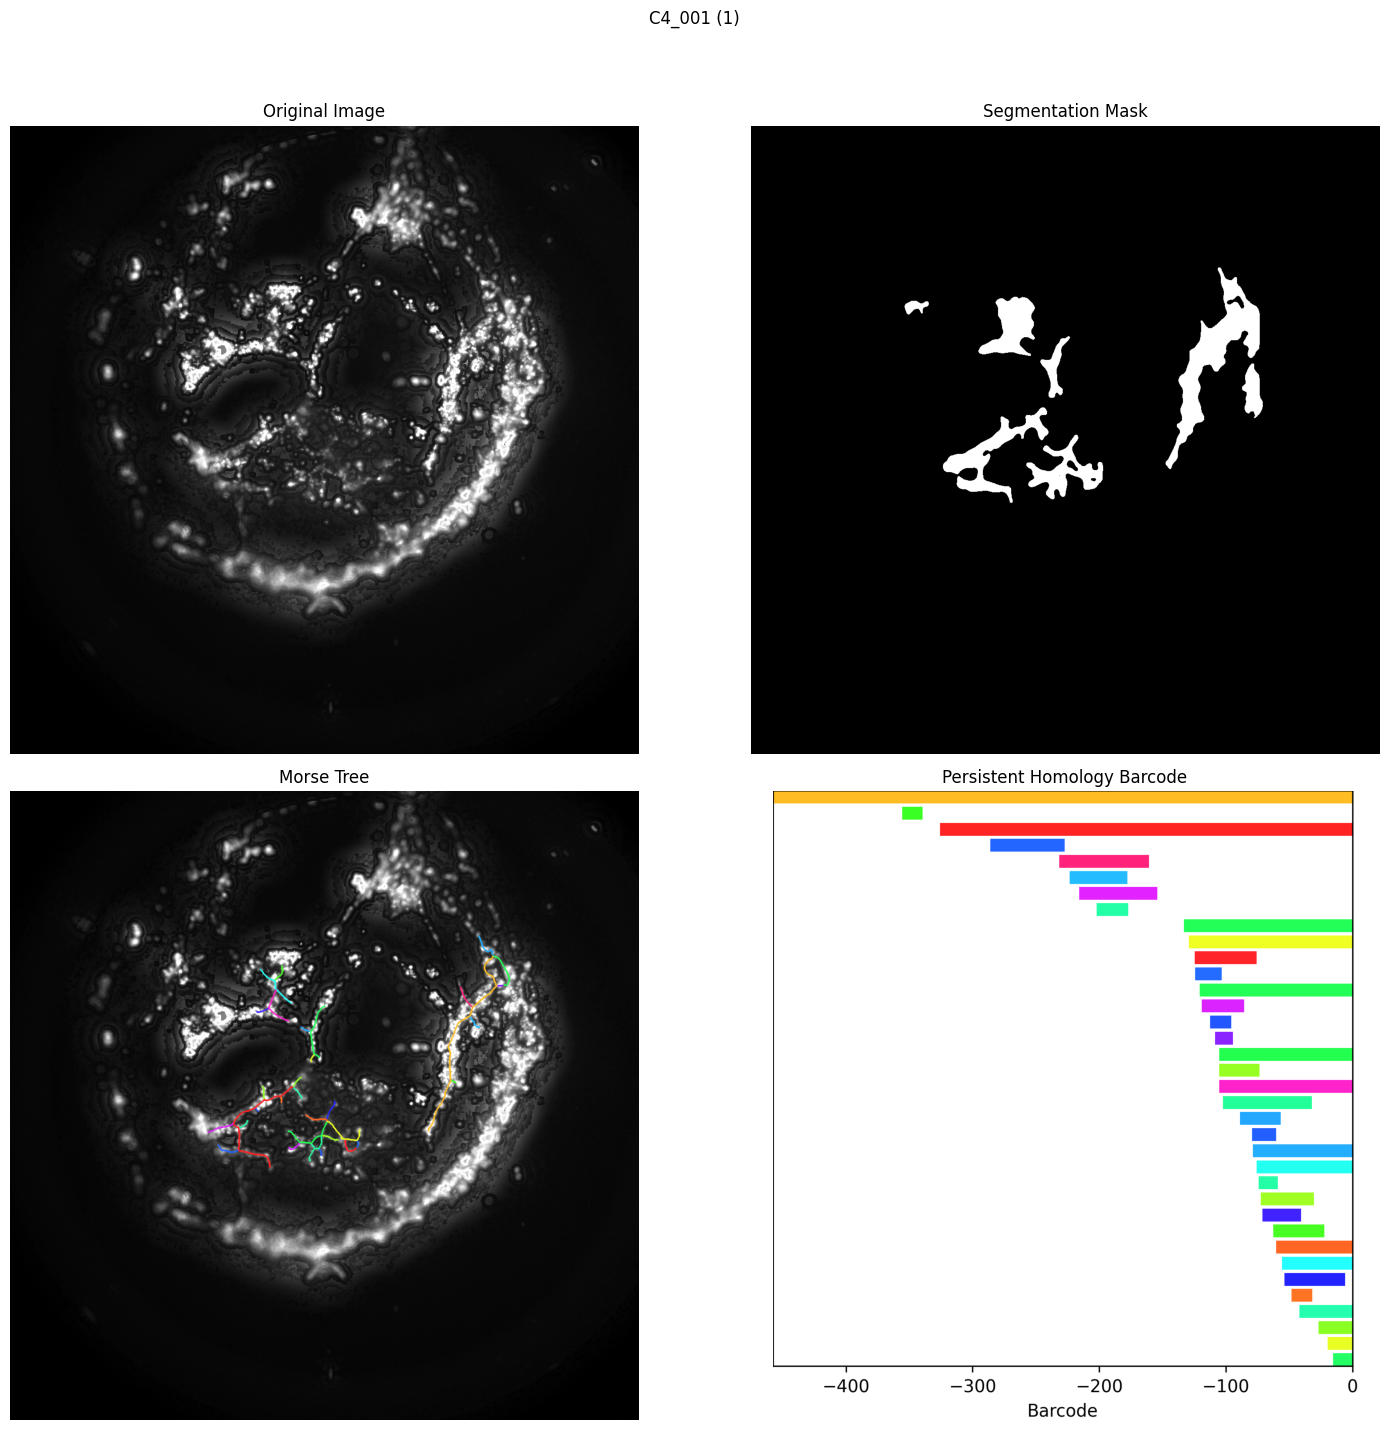

In [ ]:
# NOTE: The code below is specific to this demo notebook, not required for actual use of the tmat software package.

import os
import random
import pandas as pd
from glob import glob
from skimage import io
from matplotlib import pyplot as plt

# Show visualizations for 5 randomly sampled images. Samples with no branches are skipped

vis_dir = "/content/branching_demo_out/visualizations"
csv_path = "/content/branching_demo_out/branching_analysis.csv"

df = pd.read_csv(csv_path, encoding='utf-16')
filtered_df = df[df['Total # of branches'] > 0]

subdirs = [os.path.join(vis_dir, d) for d in filtered_df['Image'] if os.path.isdir(os.path.join(vis_dir, d))]
selected_subdirs = random.sample(subdirs, 5)

vis_filenames = ["original_image.png", "segmentation_mask.png", "morse_tree.png", "barcode.png"]
subplot_titles = ["Original Image", "Segmentation Mask", "Morse Tree", "Persistent Homology Barcode"]

for subdir in selected_subdirs:
    plt.figure(figsize=(15, 15))
    plt.suptitle(os.path.basename(subdir))

    for index, file_name in enumerate(vis_filenames, start=1):
        file_path = os.path.join(subdir, file_name)
        image = io.imread(file_path)

        plt.subplot(2, 2, index)
        plt.imshow(image, cmap='gray' if index != 4 else 'jet')
        plt.title(subplot_titles[index-1])
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()